<a href="https://colab.research.google.com/github/subhojit26/Mask_Identify/blob/main/mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')

In [ ]:
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_1894.jpg', 'with_mask_631.jpg', 'with_mask_218.jpg', 'with_mask_2634.jpg', 'with_mask_696.jpg']
['with_mask_599.jpg', 'with_mask_3149.jpg', 'with_mask_2000.jpg', 'with_mask_1174.jpg', 'with_mask_373.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')

In [ ]:
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_2943.jpg', 'without_mask_919.jpg', 'without_mask_2695.jpg', 'without_mask_1026.jpg', 'without_mask_1169.jpg']
['without_mask_3743.jpg', 'without_mask_7.jpg', 'without_mask_171.jpg', 'without_mask_3000.jpg', 'without_mask_822.jpg']


In [ ]:
print('Number of mask files',len(with_mask_files))
print('Number of without mask files',len(without_mask_files))

Number of mask files 3725
Number of without mask files 3828


Creating labels for the two class of the images

with mask = 1

without mask = 0

In [ ]:
#create the labels

with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [ ]:
labels=with_mask_labels+without_mask_labels

print(len(labels))

7553


In [ ]:
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

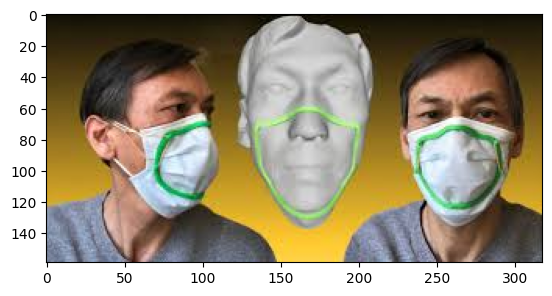

In [ ]:
# Displaying the mask images
img=mpimg.imread('/content/data/with_mask/with_mask_2586.jpg')
imgplot=plt.imshow(img)
plt.show()

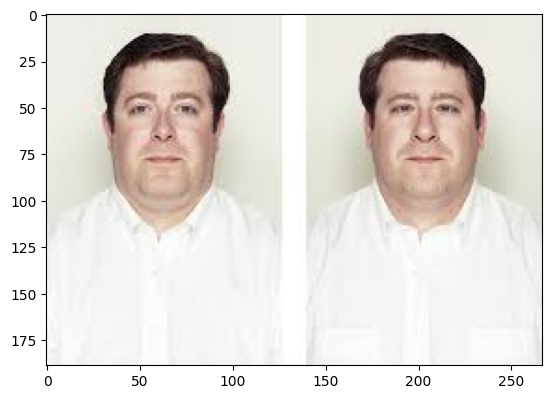

In [ ]:
# Displaying the without mask images
img=mpimg.imread('/content/data/without_mask/without_mask_2586.jpg')
imgplot=plt.imshow(img)
plt.show()

Image processing

In [ ]:
# Resize images
# convert the images to numpy arrays

with_mask_path='/content/data/with_mask/'

data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[246, 246, 246],
        [249, 249, 249],
        [248, 248, 248],
        ...,
        [246, 247, 245],
        [243, 244, 245],
        [246, 248, 249]],

       [[248, 248, 248],
        [240, 240, 240],
        [243, 243, 243],
        ...,
        [246, 245, 244],
        [242, 240, 241],
        [247, 245, 247]],

       [[248, 248, 248],
        [244, 244, 244],
        [246, 246, 246],
        ...,
        [244, 243, 244],
        [245, 243, 244],
        [249, 246, 247]],

       ...,

       [[246, 244, 248],
        [245, 244, 246],
        [242, 243, 244],
        ...,
        [100, 100,  95],
        [ 94,  97,  90],
        [ 98, 103,  95]],

       [[244, 239, 244],
        [239, 236, 239],
        [244, 243, 244],
        ...,
        [217, 211, 212],
        [217, 212, 214],
        [217, 214, 214]],

       [[240, 241, 244],
        [244, 241, 244],
        [241, 242, 244],
        ...,
        [251, 243, 245],
        [252, 245, 250],
        [251, 245, 251]]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scalling the data
# make sure all the values lie between 0 and 1
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.19607843, 0.19215686, 0.21568627],
        [0.18823529, 0.18431373, 0.20784314],
        [0.17254902, 0

Building a CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 26ms/step - loss: 0.5160 - acc: 0.7587 - val_loss: 0.2858 - val_acc: 0.8843
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.3277 - acc: 0.8626 - val_loss: 0.2503 - val_acc: 0.8926
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2707 - acc: 0.8920 - val_loss: 0.2569 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2319 - acc: 0.9071 - val_loss: 0.2486 - val_acc: 0.8992
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2019 - acc: 0.9205 - val_loss: 0.2068 - val_acc: 0.9174


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.2048 - acc: 0.9232
Test Accuracy = 0.9232296347618103


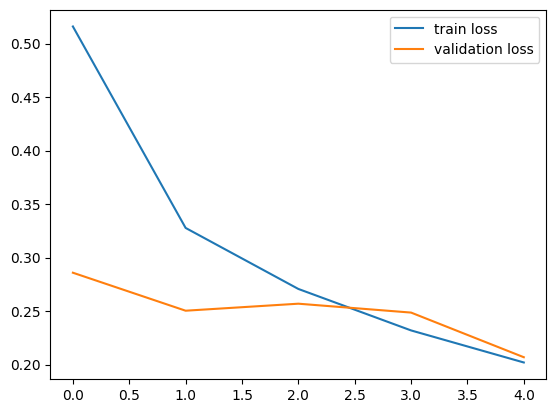

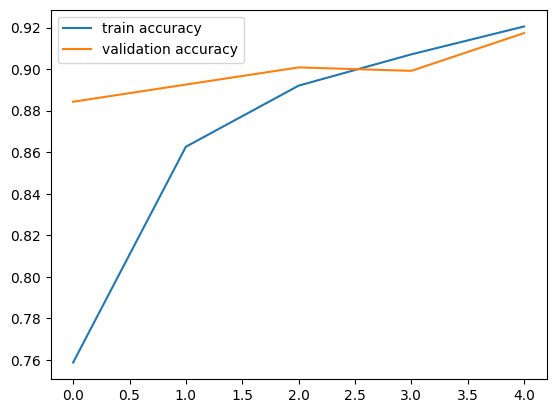

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: 


AttributeError: ignored

In [ ]:
echo "# Mask_Identifier" >> README.md

SyntaxError: ignored